# Load and analyse the raw dataset.

## Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Load Data

In [13]:
df = pd.read_csv('/home/hardikprakash/Projects/powerq/data/raw/powerconsumption.csv')

## Data Overview

In [14]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [15]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## Basic Plots

In [17]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Local Trends
df_trunc = df.head(1000)
# Long Term Trends
df_downsampled = df.iloc[::100, :]
# Overview Trends
df_downdownsampled = df.iloc[::500, :]

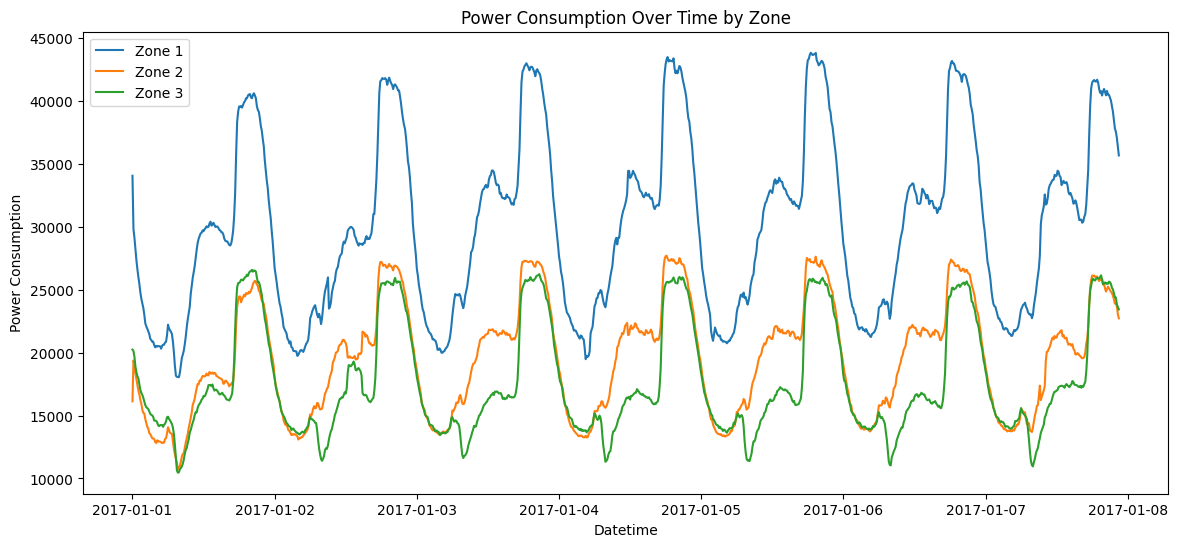

In [18]:


plt.figure(figsize=(14,6))
plt.plot(df_trunc['Datetime'], df_trunc['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(df_trunc['Datetime'], df_trunc['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(df_trunc['Datetime'], df_trunc['PowerConsumption_Zone3'], label='Zone 3')
plt.xlabel("Datetime")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Power Consumption Over Time by Zone")
plt.show()

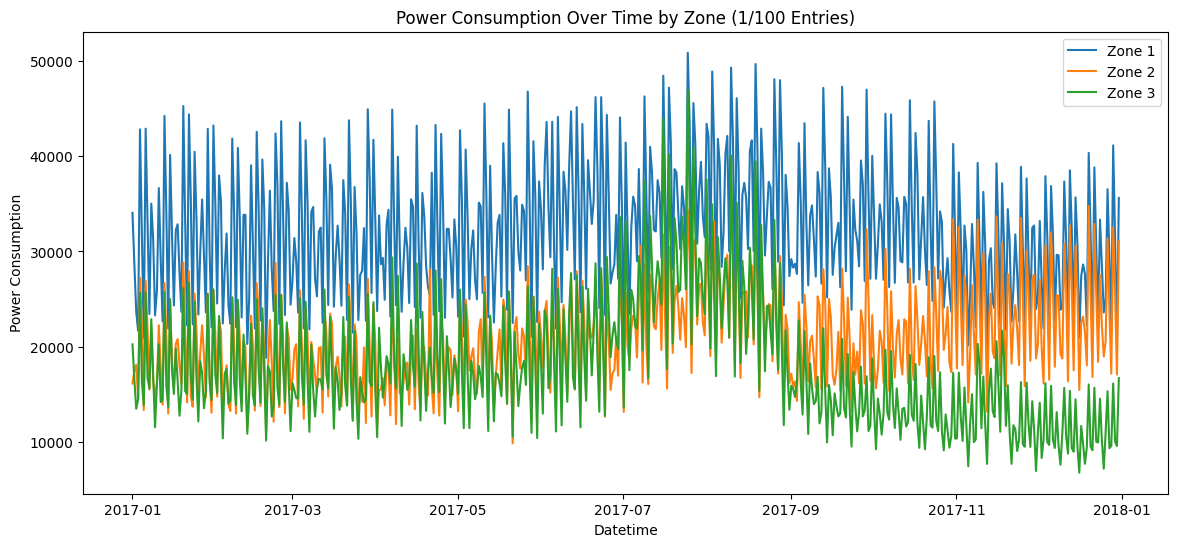

In [19]:
plt.figure(figsize=(14,6))
plt.title('Power vs. Time (1/100 Entries.)')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone3'], label='Zone 3')
plt.xlabel("Datetime")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Power Consumption Over Time by Zone (1/100 Entries)")
plt.show()

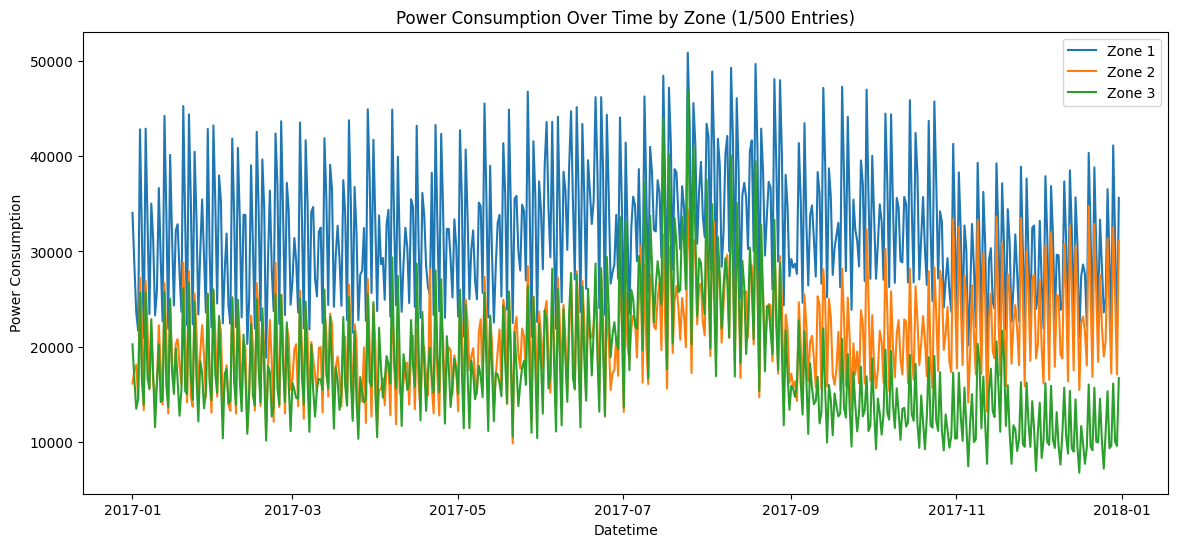

In [20]:
plt.figure(figsize=(14,6))
plt.title('Power vs. Time (1/100 Entries.)')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(df_downsampled['Datetime'], df_downsampled['PowerConsumption_Zone3'], label='Zone 3')
plt.xlabel("Datetime")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Power Consumption Over Time by Zone (1/500 Entries)")
plt.show()

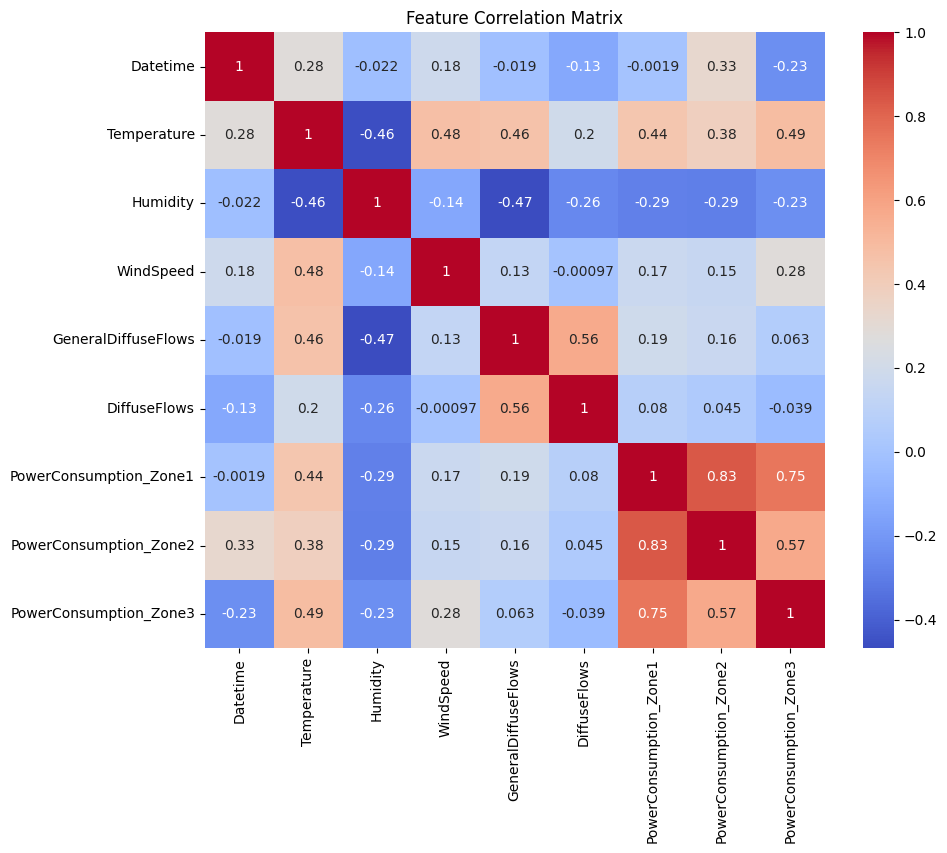

                        Datetime  Temperature  Humidity  WindSpeed  \
Datetime                1.000000     0.283018 -0.021818   0.180348   
Temperature             0.283018     1.000000 -0.460243   0.477109   
Humidity               -0.021818    -0.460243  1.000000  -0.135853   
WindSpeed               0.180348     0.477109 -0.135853   1.000000   
GeneralDiffuseFlows    -0.018527     0.460294 -0.468138   0.133733   
DiffuseFlows           -0.131816     0.196522 -0.256886  -0.000972   
PowerConsumption_Zone1 -0.001910     0.440221 -0.287421   0.167444   
PowerConsumption_Zone2  0.325206     0.382428 -0.294961   0.146413   
PowerConsumption_Zone3 -0.233929     0.489527 -0.233022   0.278641   

                        GeneralDiffuseFlows  DiffuseFlows  \
Datetime                          -0.018527     -0.131816   
Temperature                        0.460294      0.196522   
Humidity                          -0.468138     -0.256886   
WindSpeed                          0.133733     -0.0009

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
print(df.corr())

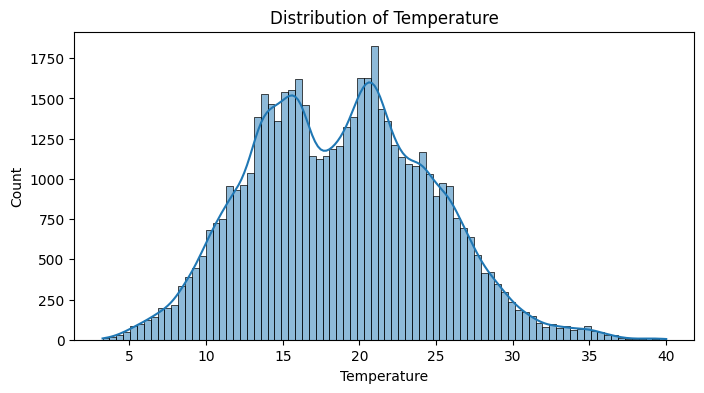

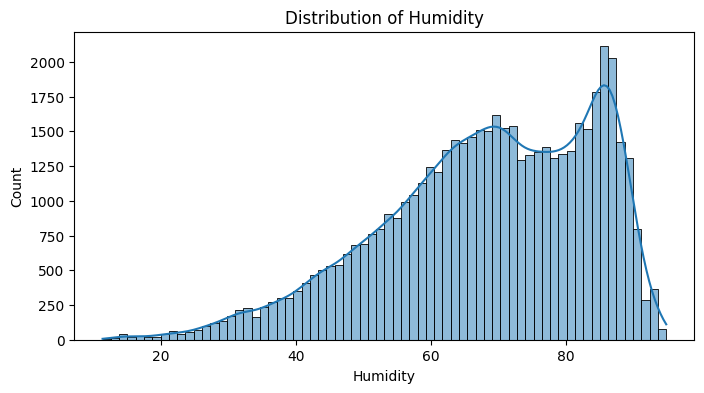

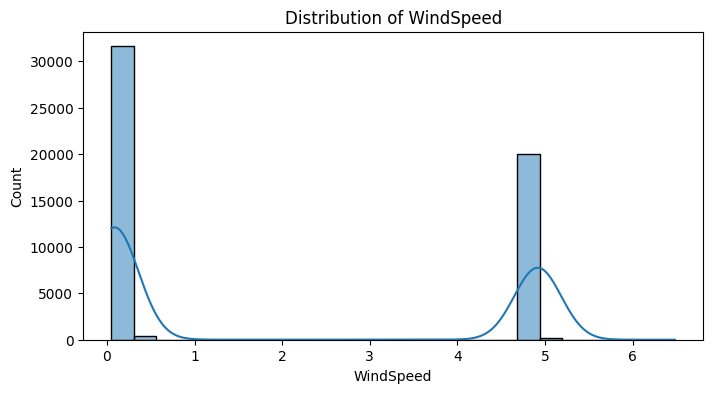

In [22]:
features = ['Temperature', 'Humidity', 'WindSpeed']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Data Relationships

### Temperature and Power

In [23]:
df_random_samples = df.sample(n=500, random_state=1)

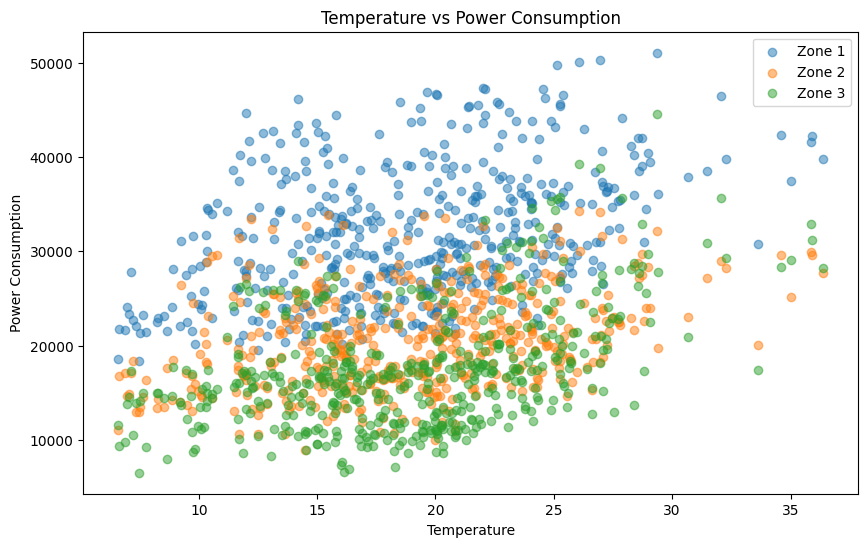

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df_random_samples['Temperature'], df_random_samples['PowerConsumption_Zone1'], alpha=0.5, label='Zone 1')
plt.scatter(df_random_samples['Temperature'], df_random_samples['PowerConsumption_Zone2'], alpha=0.5, label='Zone 2')
plt.scatter(df_random_samples['Temperature'], df_random_samples['PowerConsumption_Zone3'], alpha=0.5, label='Zone 3')
plt.xlabel("Temperature")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Temperature vs Power Consumption")
plt.show()


### Humidity and Power

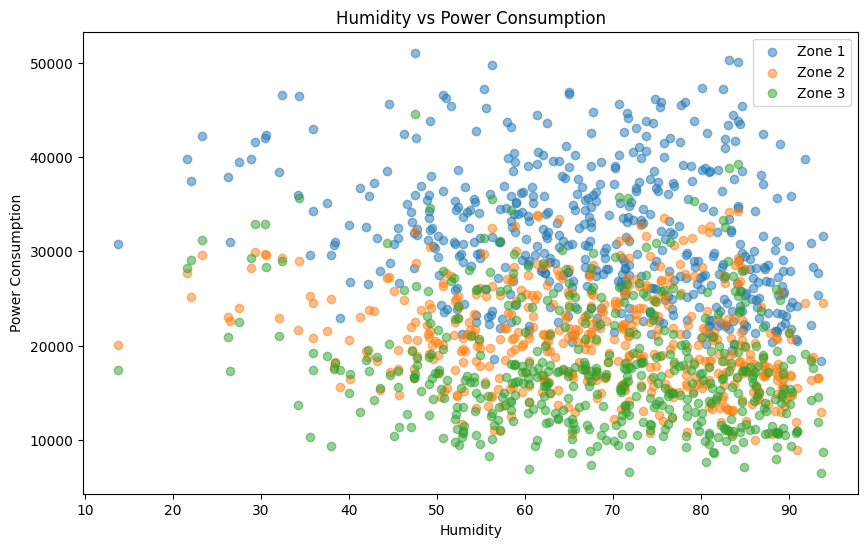

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_random_samples['Humidity'], df_random_samples['PowerConsumption_Zone1'], alpha=0.5, label='Zone 1')
plt.scatter(df_random_samples['Humidity'], df_random_samples['PowerConsumption_Zone2'], alpha=0.5, label='Zone 2')
plt.scatter(df_random_samples['Humidity'], df_random_samples['PowerConsumption_Zone3'], alpha=0.5, label='Zone 3')
plt.xlabel("Humidity")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Humidity vs Power Consumption")
plt.show()


### Wind and Power

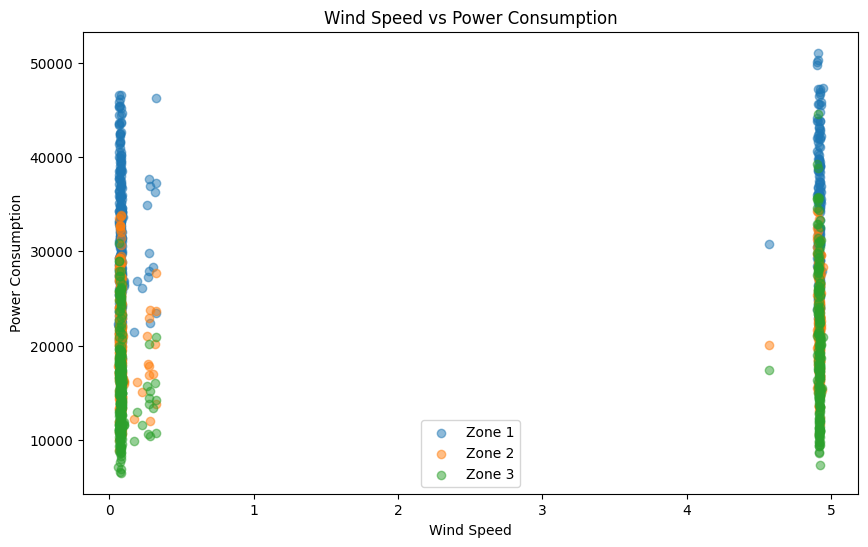

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_random_samples['WindSpeed'], df_random_samples['PowerConsumption_Zone1'], alpha=0.5, label='Zone 1')
plt.scatter(df_random_samples['WindSpeed'], df_random_samples['PowerConsumption_Zone2'], alpha=0.5, label='Zone 2')
plt.scatter(df_random_samples['WindSpeed'], df_random_samples['PowerConsumption_Zone3'], alpha=0.5, label='Zone 3')
plt.xlabel("Wind Speed")
plt.ylabel("Power Consumption")
plt.legend()
plt.title("Wind Speed vs Power Consumption")
plt.show()


## Seasonal Trends

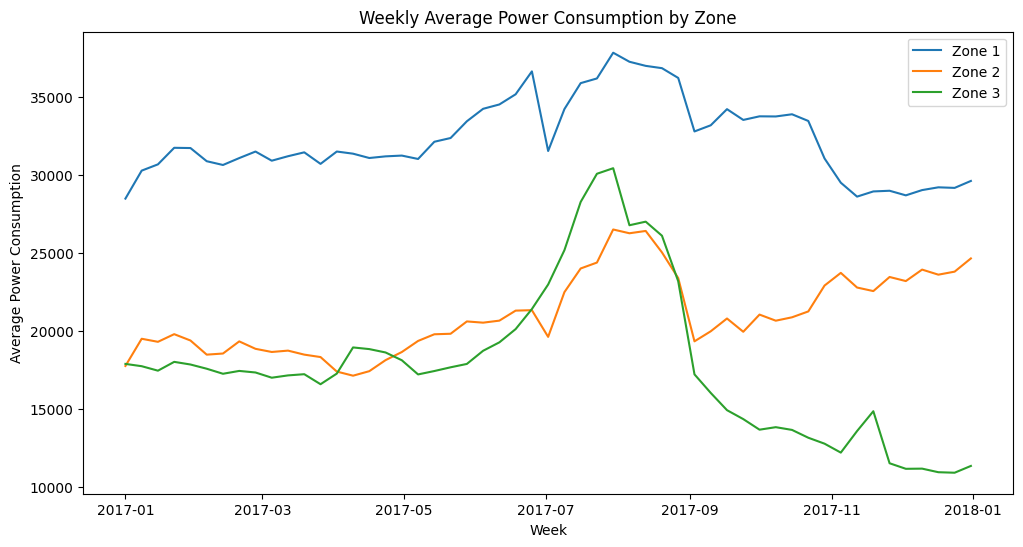

In [27]:
df.set_index('Datetime', inplace=True)

weekly_data = df.resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(weekly_data.index, weekly_data['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(weekly_data.index, weekly_data['PowerConsumption_Zone3'], label='Zone 3')
plt.xlabel("Week")
plt.ylabel("Average Power Consumption")
plt.legend()
plt.title("Weekly Average Power Consumption by Zone")
plt.show()


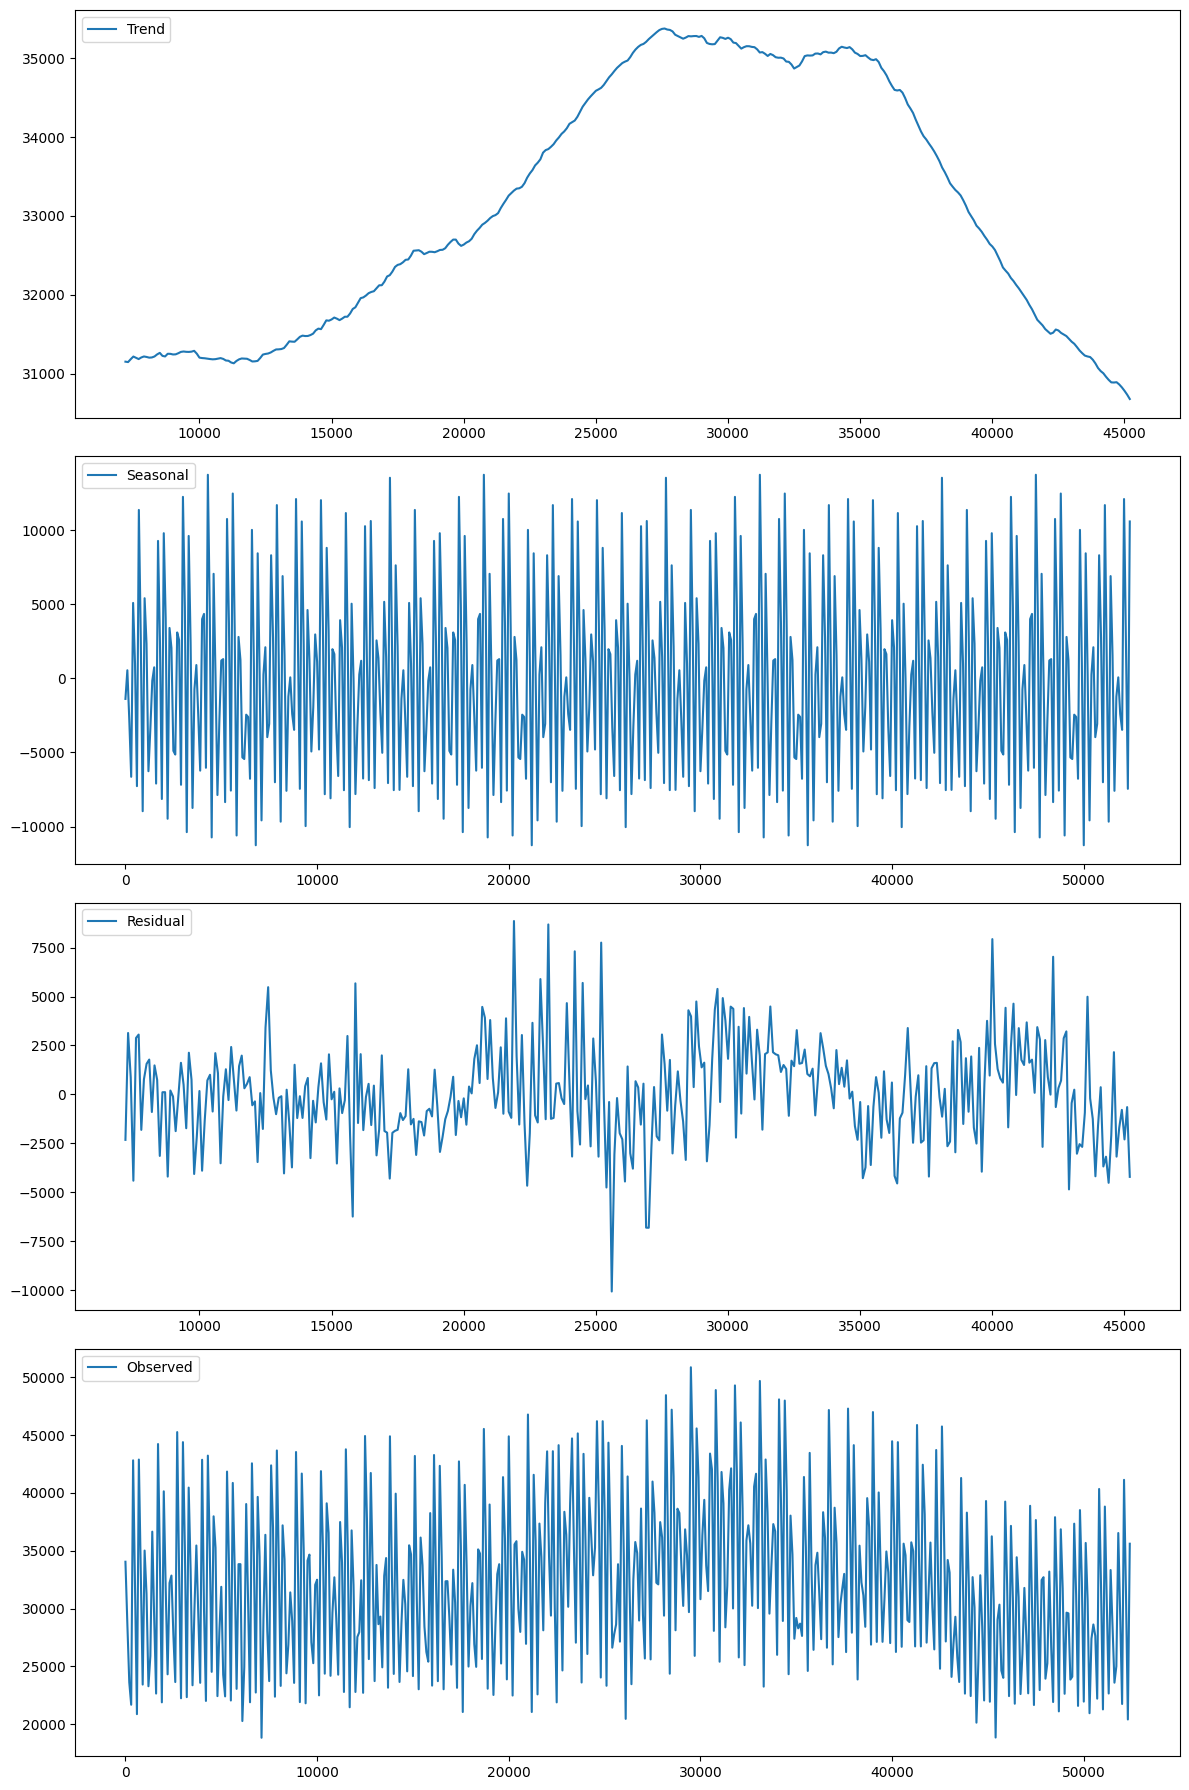

In [28]:
decomposed = seasonal_decompose(df_downsampled['PowerConsumption_Zone1'], model='additive', period=144)  # Assuming 144 periods per day

plt.figure(figsize=(12, 18))

plt.subplot(4, 1, 1)
plt.plot(decomposed.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposed.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposed.resid, label='Residual')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposed.observed, label='Observed')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
